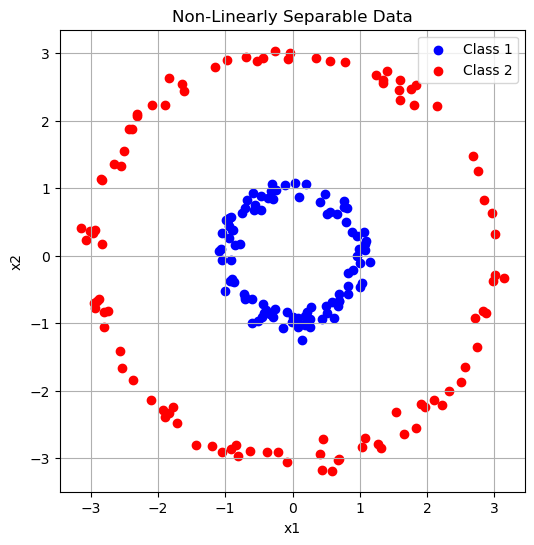

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#  Generate not linearly separable 2D Toy Data 

# Inner circular class (class 1)
r1 = 1  # radius of the inner circle
theta1 = 2 * np.pi * np.random.rand(100)  # random angles from 0 to 2pi
x1 = r1 * np.c_[np.cos(theta1), np.sin(theta1)] + 0.1 * np.random.randn(100, 2)
# Create 100 noisy points on the inner circle

# Outer circular class (class 2)
r2 = 3  # radius of the outer circle
theta2 = 2 * np.pi * np.random.rand(100)  # random angles from 0 to 2pi
x2 = r2 * np.c_[np.cos(theta2), np.sin(theta2)] + 0.1 * np.random.randn(100, 2)
# Create 100 noisy points on the outer circle

# Combine both classes into one dataset
X = np.vstack((x1, x2))  # features
y = np.hstack((np.ones(100), -np.ones(100)))  # labels: class 1 = +1, class 2 = -1

#  Visualize 
plt.figure(figsize=(6, 6))
plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], color='red', label='Class 2')
plt.legend()
plt.title('Non-Linearly Separable Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()


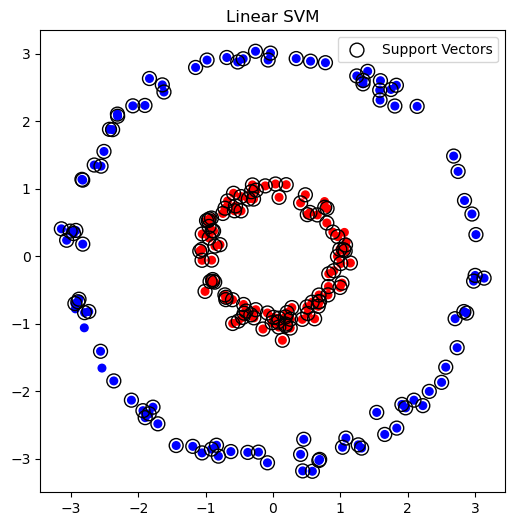

Accuracy (Linear SVM): 0.685
Number of Support Vectors: 194


In [2]:
from sklearn.svm import SVC

# Train a Linear SVM
linear_svm = SVC(kernel='linear')  # linear kernel
linear_svm.fit(X, y)  # fit the SVM model to the dataset

# Plot Decision Boundaries and Support Vectors
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)  
plt.scatter(linear_svm.support_vectors_[:, 0],
            linear_svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title('Linear SVM')
plt.legend()
plt.show()

#  Performance
print("Accuracy (Linear SVM):", linear_svm.score(X, y))
print("Number of Support Vectors:", len(linear_svm.support_))


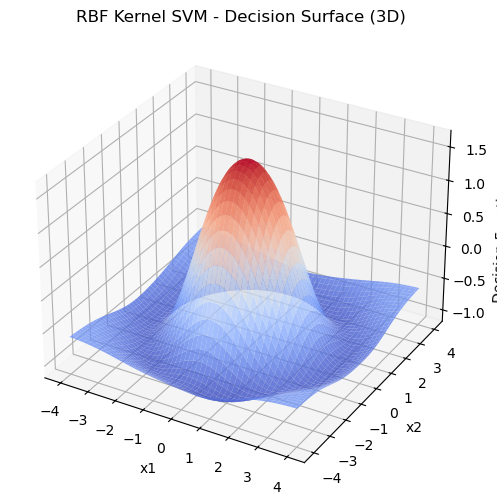

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Train a Non-Linear SVM with RBF Kernel
nonlinear_svm = SVC(kernel='rbf', C=1, gamma='auto')  # RBF kernel
nonlinear_svm.fit(X, y)

# Create a Meshgrid for Decision Function
xx, yy = np.meshgrid(np.linspace(-4, 4, 100),
                     np.linspace(-4, 4, 100))
zz = nonlinear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)  # Reshape 

# 3D Visualization of Decision Surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, alpha=0.8)
ax.set_title('RBF Kernel SVM - Decision Surface (3D)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Decision Function Value')
plt.show()


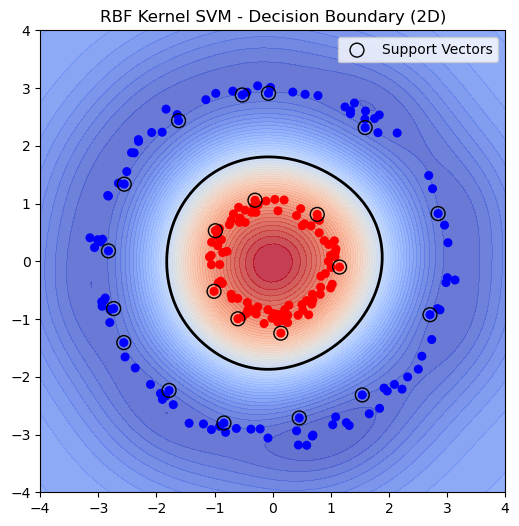

In [4]:
# 2D Visualization of Decision Boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, zz, levels=np.linspace(zz.min(), zz.max(), 50), cmap=cm.coolwarm, alpha=0.8)
plt.contour(xx, yy, zz, levels=[0], linewidths=2, colors='k')  # decision boundary 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
plt.scatter(nonlinear_svm.support_vectors_[:, 0],
            nonlinear_svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='black', label='Support Vectors')
plt.title('RBF Kernel SVM - Decision Boundary (2D)')
plt.legend()
plt.show()
